<a href="https://colab.research.google.com/github/tomvanstraaten2001/sprin4_portfolio/blob/main/Sprint4_Portfolio_opdracht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Portfolio opdracht**.

Aandelen:

Thuisbezorgd: (TKWY.AS) https://finance.yahoo.com/quote/TKWY.AS/  

Postnl: (PNL.AS) https://finance.yahoo.com/quote/PNL.AS?.tsrc=fin-srch  

Crypto:  

Bitcoin: (BTC-EUR) https://finance.yahoo.com/quote/BTC-EUR?.tsrc=fin-srch  

Bond:

Ishares global corp: (IBCQ.DE) https://finance.yahoo.com/quote/IBCQ.DE?.tsrc=fin-srch

In [ ]:
#pragramma's installeren
! pip install pandas-datareader==0.10.0
! pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
from datetime import date

#alle output niet weergeven
from google.colab import output
output.clear()

In [ ]:
#koers data inladen
yf.pdr_override()
start = dt.datetime(2018,1,2)
end = dt.datetime(2024,1,2)

Thuisbezorgd = web.get_data_yahoo('TKWY.AS', start, end).tz_localize(None)
PostNL = web.get_data_yahoo('PNL.AS', start, end).tz_localize(None)
Bitcoin = web.get_data_yahoo('BTC-EUR', start, end).tz_localize(None)
Bond = web.get_data_yahoo('IBCQ.DE', start, end).tz_localize(None)

output.clear()

In [ ]:
Thuisbezorgd_slotkoers = Thuisbezorgd.loc[:, ["Close"]]

begin = Thuisbezorgd_slotkoers.head(1).squeeze()
eind = Thuisbezorgd_slotkoers.tail(1).squeeze()

rendement = (eind - begin) / begin / 6 # (nieuw- oud) / oud, gedeeld door 6 omdat we 6 jaar aan data ingelezen hebben
rendement

-0.12136094878165819

In [ ]:
PostNL_slotkoers = PostNL.loc[:, ["Close"]]

begin = PostNL_slotkoers.head(1).squeeze()
eind = PostNL_slotkoers.tail(1).squeeze()

rendement = (eind - begin) / begin / 6 # (nieuw- oud) / oud, gedeeld door 6 omdat we 6 jaar aan data ingelezen hebben

rendement

-0.10921362952377783

In [ ]:
Bitcoin_slotkoers = Bitcoin.loc[:, ["Close"]]

begin = Bitcoin_slotkoers.head(1).squeeze()
eind = Bitcoin_slotkoers.tail(1).squeeze()

rendement = (eind - begin) / begin / 6 # (nieuw- oud) / oud, gedeeld door 6 omdat we 6 jaar aan data ingelezen hebben

rendement

0.3470995758800499

In [ ]:
Bond_slotkoers = Bond.loc[:, ["Close"]]

begin = Bond_slotkoers.head(1).squeeze()
eind = Bond_slotkoers.tail(1).squeeze()

rendement = (eind - begin) / begin / 6 # (nieuw- oud) / oud, gedeeld door 6 omdat we 6 jaar aan data ingelezen hebben

rendement

-0.028467520081253094

Het gemiddelde dagrendement is -0.0003308195175329727
Het gemiddelde jaarrendement is -0.07938979508900268


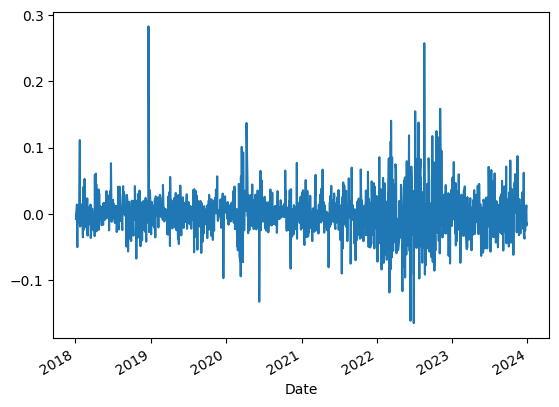

In [ ]:
dag_rendement_thuisbezorgd = Thuisbezorgd.loc[:, "Close"].pct_change()
dag_rendement_thuisbezorgd.plot()
Thuisbezorgd_gemiddeld_rendement_jaar = (1+dag_rendement_thuisbezorgd.mean())**250-1 # We gaan uit van 250 handelsdagen voor aandelen en obligaties.

print("Het gemiddelde dagrendement is", dag_rendement_thuisbezorgd.mean())
print("Het gemiddelde jaarrendement is", Thuisbezorgd_gemiddeld_rendement_jaar)

Het gemiddelde dagrendement is -0.000384225173650532
Het gemiddelde jaarrendement is -0.09160389068083485


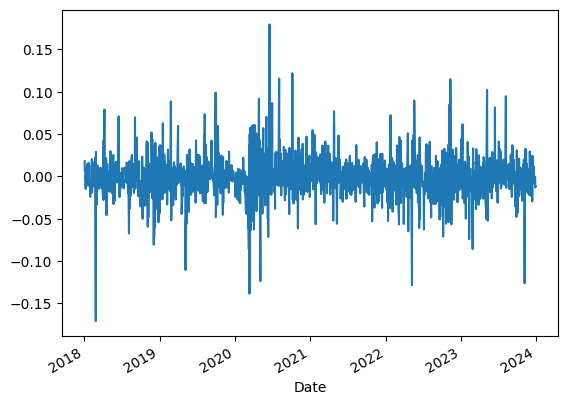

In [ ]:
dag_rendement_PostNL = PostNL.loc[:, "Close"].pct_change()
dag_rendement_PostNL.plot()
PostNL_gemiddeld_rendement_jaar = (1+dag_rendement_PostNL.mean())**250-1 # We gaan uit van 250 handelsdagen voor aandelen en obligaties.

print("Het gemiddelde dagrendement is", dag_rendement_PostNL.mean())
print("Het gemiddelde jaarrendement is", PostNL_gemiddeld_rendement_jaar)

Het gemiddelde dagrendement is 0.001172229953887242
Het gemiddelde jaarrendement is 0.533593004909495


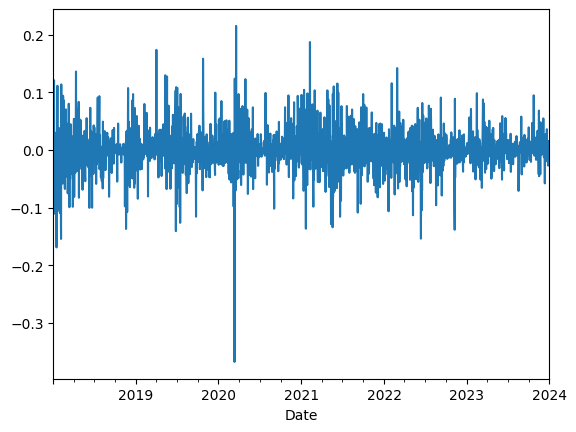

In [ ]:
dag_rendement_Bitcoin = Bitcoin.loc[:, "Close"].pct_change()
dag_rendement_Bitcoin.plot()
Bitcoin_gemiddeld_rendement_jaar = (1+dag_rendement_Bitcoin.mean())**365-1 # We gaan uit van 250 handelsdagen voor aandelen en obligaties.

print("Het gemiddelde dagrendement is", dag_rendement_Bitcoin.mean())
print("Het gemiddelde jaarrendement is", Bitcoin_gemiddeld_rendement_jaar)

Het gemiddelde dagrendement is -0.00011400253900124675
Het gemiddelde jaarrendement is -0.028099901812294492


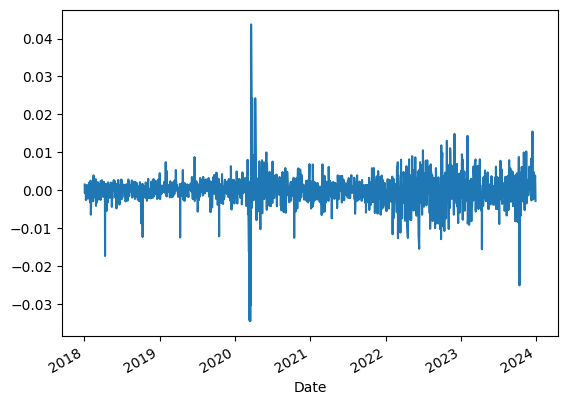

In [ ]:
dag_rendement_Bond = Bond.loc[:, "Close"].pct_change()
dag_rendement_Bond.plot()
Bond_gemiddeld_rendement_jaar = (1+dag_rendement_Bond.mean())**250-1 # We gaan uit van 250 handelsdagen voor aandelen en obligaties.

print("Het gemiddelde dagrendement is", dag_rendement_Bond.mean())
print("Het gemiddelde jaarrendement is", Bond_gemiddeld_rendement_jaar)

#portfolio waarde grafiek

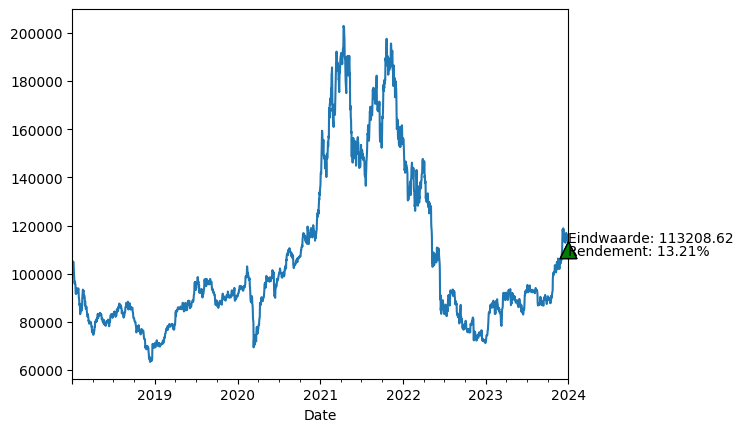

In [ ]:
#laat de waarde van de portfolio zien in een grafiek met de eindwaard plus rendement
samengevoegd = pd.concat([Thuisbezorgd.add_suffix("_TKWY"), PostNL.add_suffix("_Post"), Bitcoin.add_suffix("_BTC"), Bond.add_suffix("_Bond") ], axis=1)
samengevoegd = samengevoegd.loc[:, ["Close_TKWY", "Close_Post", "Close_BTC", "Close_Bond"]]
samengevoegd_fill = samengevoegd.ffill()

investeringen = pd.Series([25000, 25000, 25000, 25000], index=["Close_TKWY", "Close_Post","Close_BTC", "Close_Bond"])
aankoop_prijzen = samengevoegd_fill.head(1).squeeze()
aantal_aandelen = investeringen / aankoop_prijzen
portfolio_waarde = (samengevoegd_fill * aantal_aandelen).sum(axis=1)
samengevoegd_fill['portfolio_waarde'] = portfolio_waarde

portfolio_waarde.plot()

laatste_datum = portfolio_waarde.index[-1]
laatste_waarde = portfolio_waarde[-1]

laatste_waarde_afgerond = round(laatste_waarde, 2)

#rendement
totale_investering = investeringen.sum()
rendement = (laatste_waarde / totale_investering - 1) * 100
rendement_afgerond = round(rendement, 2)

#eindwaarde
plt.annotate(f'Eindwaarde: {laatste_waarde_afgerond}', xy=(laatste_datum, laatste_waarde), xytext=(laatste_datum, laatste_waarde),
             arrowprops=dict(facecolor='red'))
plt.annotate(f'Rendement: {rendement_afgerond}%', xy=(laatste_datum, laatste_waarde), xytext=(laatste_datum, laatste_waarde*0.95),
             arrowprops=dict(facecolor='green'))

plt.show()


#Losse investeringen grafiek

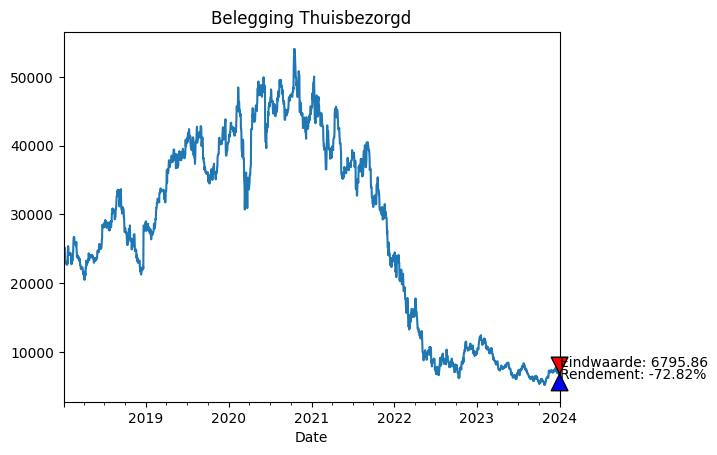

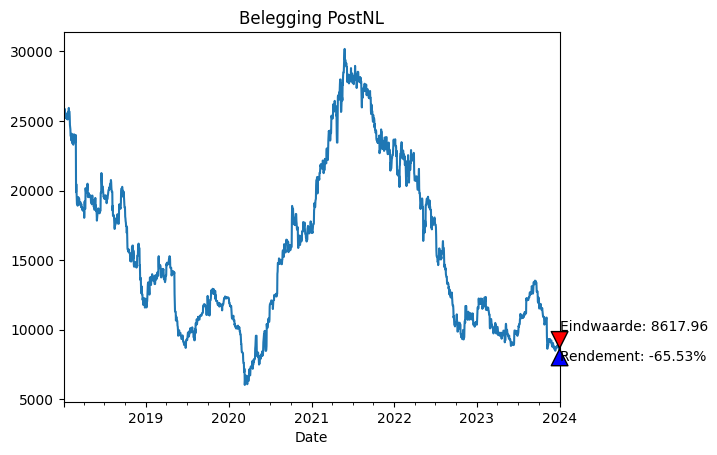

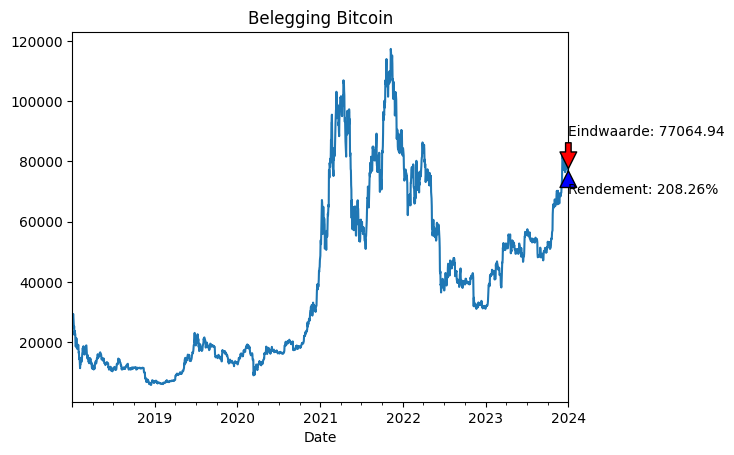

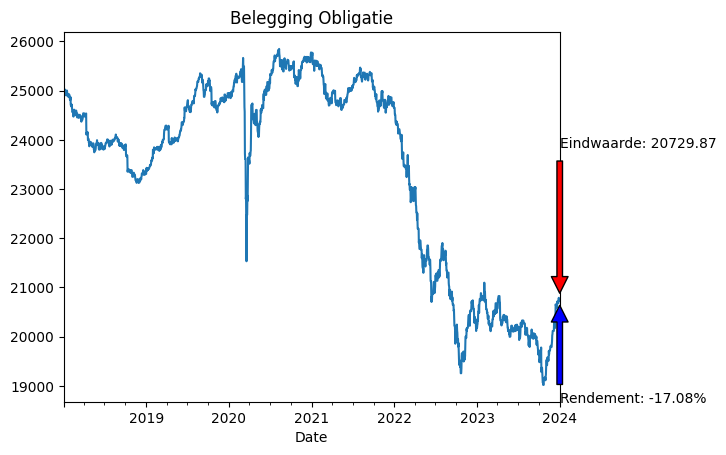

In [ ]:
#laat de waarde van de belegging per aandeel zien in een grafiek plus de eindwaarde en het rendement
waarde_TKWY = samengevoegd_fill['Close_TKWY'] * aantal_aandelen['Close_TKWY']
waarde_Post = samengevoegd_fill['Close_Post'] * aantal_aandelen['Close_Post']
waarde_BTC = samengevoegd_fill['Close_BTC'] * aantal_aandelen['Close_BTC']
waarde_Bond = samengevoegd_fill['Close_Bond'] * aantal_aandelen['Close_Bond']

samengevoegd_fill['waarde_TKWY'] = waarde_TKWY
samengevoegd_fill['waarde_Post'] = waarde_Post
samengevoegd_fill['waarde_BTC'] = waarde_BTC
samengevoegd_fill['waarde_Bond'] = waarde_Bond


def plot_met_eindwaarde(waarde, titel, investering):
    waarde.plot(title=titel)
    laatste_datum = waarde.index[-1]
    laatste_waarde = round(waarde[-1], 2)
    rendement = round((laatste_waarde / investering - 1) * 100, 2)
    plt.annotate(f'Eindwaarde: {laatste_waarde}', xy=(laatste_datum, laatste_waarde), xytext=(laatste_datum, laatste_waarde*1.15),
                 arrowprops=dict(facecolor='red', shrink=0.05))
    plt.annotate(f'Rendement: {rendement}%', xy=(laatste_datum, laatste_waarde), xytext=(laatste_datum, laatste_waarde*0.90),
                 arrowprops=dict(facecolor='blue', shrink=0.05))
    plt.show()


plot_met_eindwaarde(waarde_TKWY, 'Belegging Thuisbezorgd', investeringen['Close_TKWY'])
plot_met_eindwaarde(waarde_Post, 'Belegging PostNL', investeringen['Close_Post'])
plot_met_eindwaarde(waarde_BTC, 'Belegging Bitcoin', investeringen['Close_BTC'])
plot_met_eindwaarde(waarde_Bond, 'Belegging Obligatie', investeringen['Close_Bond'])



#Toelichting grafieken
Rendement:
- Een negatief gemiddeld dag en jaarrendement voor Thuisbezorgd duidt op een dalende waarde van de investering, mogelijk als gevolg van uitdagingen in de markt of binnen het bedrijf zelf.
- Voor PostNL betekent een gemiddeld dagrendement van -0.000384225173650532 en een gemiddeld jaarrendement van -0.09160389068083485 dat de waarde van de investeringen in PostNL gedurende die perioden is afgenomen
- Het gemiddelde dagrendement van Bitcoin is 0.001172229953887242 en het gemiddelde jaarrendement is 0.533593004909495, wat aangeeft dat de waarde van Bitcoin gedurende die perioden is gestegen, wat gunstig is voor investeerders.
- Voor Europese obligaties betekent een gemiddeld dagrendement van -0.00011400253900124675 en een gemiddeld jaarrendement van -0.028099901812294492 dat de waarde van de investeringen in Europese obligaties gedurende die perioden is afgenomen
- Bij de beleggingen van Thuisbezorgd, Bitcoin, PostNL en de europese obligatie, hebben we 25.000 eur geinvesteerd. Alleen de bitcoin beleggging is gestegen, dat betekend dat de investering winst genereert.

#standaard-afwijking losse beleggingen

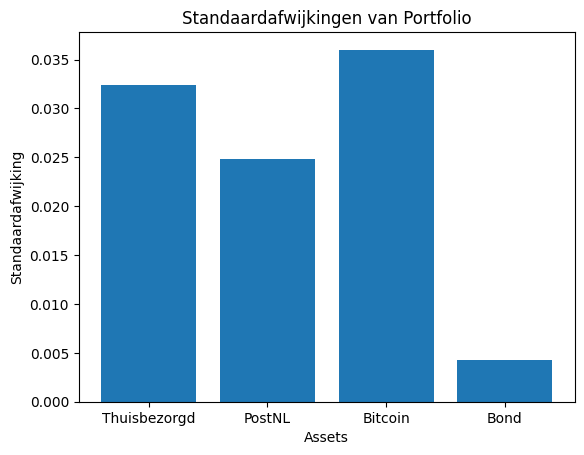

In [ ]:
std_devs = [dag_rendement_thuisbezorgd.std(), dag_rendement_PostNL.std(), dag_rendement_Bitcoin.std(), dag_rendement_Bond.std()]
assets = ['Thuisbezorgd', 'PostNL', 'Bitcoin', 'Bond']

# Zorg ervoor dat std_devs een lijst of 1D-array is
std_devs = np.array(std_devs)  # Dit converteert de lijst naar een 1D-array als dat nog niet het geval was

# Maak een grafiek met de standaardafwijkingen
plt.bar(assets, std_devs)
plt.title('Standaardafwijkingen van Portfolio')
plt.xlabel('Assets')
plt.ylabel('Standaardafwijking')
plt.show()

#standaardafwijking portfolio

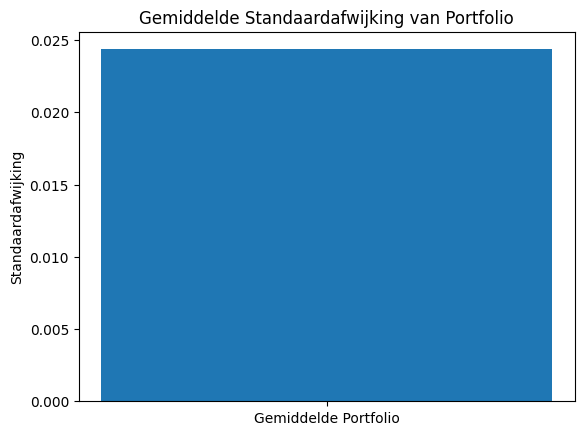

In [ ]:
gemiddelde_std_dev = np.mean(std_devs)

# Maak een grafiek met het gemiddelde van de standaardafwijkingen
plt.bar('Gemiddelde Portfolio', gemiddelde_std_dev)
plt.title('Gemiddelde Standaardafwijking van Portfolio')
plt.ylabel('Standaardafwijking')
plt.show()

#mogelijk verlies 2,5% van de slechtste gevallen

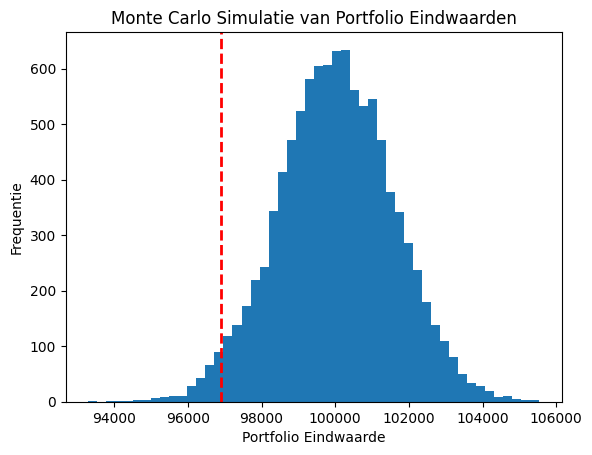

De geschatte Value at Risk op het 2,5% percentiel is: 3107.61


In [ ]:

# Portfolio gewichten
gewichten = np.array([0.25, 0.25, 0.25, 0.25])

# Historische rendementen combineren in een DataFrame
portfolio_rendementen = pd.DataFrame({
    'Thuisbezorgd': dag_rendement_thuisbezorgd,
    'PostNL': dag_rendement_PostNL,
    'Bitcoin': dag_rendement_Bitcoin,
    'Bond': dag_rendement_Bond
})

# Gemiddelde en covariantiematrix berekenen
gemiddelde_rendementen = portfolio_rendementen.mean()
cov_matrix = portfolio_rendementen.cov()

# Aantal simulaties
n_simulaties = 10000
tijdshorizon = 1  # bijvoorbeeld 1 dag
portfolio_waarde = 100000

# Lege lijst om de gesimuleerde portfolio eindwaarden op te slaan
gesimuleerde_eindwaarden = []

for _ in range(n_simulaties):
    # Willekeurige rendementen genereren met de Monte Carlo-simulatie
    willekeurige_rendementen = np.random.multivariate_normal(gemiddelde_rendementen, cov_matrix, tijdshorizon)
    gesimuleerde_rendement = np.sum(willekeurige_rendementen * gewichten)

    # Gesimuleerde eindwaarde van het portfolio
    gesimuleerde_eindwaarde = portfolio_waarde * (1 + gesimuleerde_rendement)
    gesimuleerde_eindwaarden.append(gesimuleerde_eindwaarde)

# Bereken de VaR op het 2,5% percentiel
VaR_2_5 = np.percentile(gesimuleerde_eindwaarden, 2.5)
mogelijk_verlies = portfolio_waarde - VaR_2_5

# Grafiek van de gesimuleerde eindwaarden
plt.hist(gesimuleerde_eindwaarden, bins=50)
plt.axvline(VaR_2_5, color='r', linestyle='dashed', linewidth=2)
plt.title('Monte Carlo Simulatie van Portfolio Eindwaarden')
plt.xlabel('Portfolio Eindwaarde')
plt.ylabel('Frequentie')
plt.show()

print(f"De geschatte Value at Risk op het 2,5% percentiel is: {mogelijk_verlies:.2f}")


#covariante thuisbezorgd en postnl

#beta portfolio

#beta losse beleggingen